# PERU: Economic Freedom and Human Development 1970 -2016

## Introduction
Una de las ideas más arraigadas en la politica latinoamericana de los últimos 40 años es que el libre mercado es el (único) camino para el desarrollo del país y de su población, y, por tanto, en la medida que los gobiernos se alejen de esas prácticas al país le irá mal y se alejará del tan ansiado desarrollo.   
El objetivo de este artículo es basarnos en datos para darle una mirada a este casi mandamiento económico y político, basándonos en el caso peruano, país, en donde, para muchos políticos el libre mercado es casi una religión, un acto de fe que no requiere demostración.   
Un instrumento valioso que utilizaremos para nuestros propósitos es el índice de libertad económica (que llamaremos SCORE) publicado en el [Economic Freedom of the World](https://www.fraserinstitute.org/studies/economic-freedom) por el Frazer Institute. El índice clasifica a los paises según cinco áreas: 1. Tamaño de gobierno, 2. Estructura legal y derechos de propiedad, 3. Acceso a dinero sólido, 4. Libertad de comercio internacional y 5. Regulación del crédito, trabajo y negocios. Lo que significaría que, en la medida que en un país el tamaño de gobierno y la regulación sea menor, y la solidez monetaria, los derechos de propiedad y la libertad de comercio exterior sean mayores el índice o SCORE de libertad económica será más alto y por ende mejor. 
El artículo propuesto de esta manera será útil también con fines comparativos, ya que permitirá contrastar lo que se dice con lo que ha sucedido en los distintos gobiernos entre 1970 y 2016, que para el Perú será interesante especialmente por lo que los políticos pregonan diariamente, muchas veces (o casi nunca) con evidencia que la sustente.
Por otro lado, para medir el desarrollo recurriremos al [Indice de Desarrollo Humano](http://hdr.undp.org/en/content/human-development-index-hdi) del PNUD. La información en este caso es desde 1990 y nos basaremos únicamente en el IDH y no en los indicadores que lo componen (Esperanza de vida al nacer, población con educación secundaria completa, años de educación e ingreso familiar per cápita).

Nota: El trabajo toma como punto de partida el trabajo de Giovanni Zanatta [Comparing Economic Freedom with the HDI](https://www.kaggle.com/gzanatta/comparing-economic-freedom-with-the-hdi-eda).


## 1. Importing Packages

In [65]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

## 2. Loading Data

In [3]:
path = "./EF_HDI/efw_cc.csv"
data = pd.read_csv(path)

## Getting To Know About The Dataset

In [6]:
print('Dimensions:', data.shape)

Dimensions: (3726, 36)


In [7]:
data.head(8)

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069
5,2016,AUS,Australia,7.98,10.0,1.0,4.511765,6.664948,10.0,5.0,...,9.452540,8.820000,7.427103,10.00000,3.859781,7.526721,9.576358,7.698589,8.121631,8.465526
6,2016,AUT,Austria,7.58,27.0,1.0,3.744118,3.101062,10.0,3.5,...,9.432830,8.266133,8.254011,10.00000,5.906786,8.106733,9.129015,5.565118,7.419870,7.371334
7,2016,AZE,Azerbaijan,6.49,106.0,3.0,6.320588,7.881208,0.0,6.5,...,7.513487,7.973778,6.799052,10.00000,4.093268,7.216525,7.467778,6.076782,7.080078,6.874880


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                3726 non-null   int64  
 1   ISO_code                            3726 non-null   object 
 2   countries                           3726 non-null   object 
 3   ECONOMIC FREEDOM                    3003 non-null   float64
 4   rank                                3003 non-null   float64
 5   quartile                            3003 non-null   float64
 6   1a_government_consumption           3137 non-null   float64
 7   1b_transfers                        2766 non-null   float64
 8   1c_gov_enterprises                  3080 non-null   float64
 9   1d_top_marg_tax_rate                2679 non-null   float64
 10  1_size_government                   3079 non-null   float64
 11  2a_judicial_independence            2173 no

In [10]:
data.describe()

,year,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,1_size_government,2a_judicial_independence,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
count,3726.000000,3003.000000,3003.000000,3003.000000,3137.000000,2766.000000,3080.000000,2679.000000,3079.000000,2173.000000,...,3115.000000,3045.000000,2378.000000,3109.000000,3134.000000,3035.000000,3107.000000,2568.000000,2324.000000,2998.000000
mean,2001.347826,6.519640,68.307026,2.497835,5.862426,7.672901,5.737987,5.813177,6.232061,5.019474,...,7.660619,7.078796,6.332996,9.115282,4.376398,6.719849,7.732523,6.168449,6.188570,6.638470
std,12.735125,1.133638,41.343417,1.118963,2.270241,2.138957,3.242377,2.654083,1.447985,2.249670,...,1.812816,1.821355,1.712494,2.460966,2.694049,1.720183,2.123763,1.509150,1.268471,1.240397
min,1970.000000,1.970000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.653797,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.837167,2.009841,1.002000
25%,1995.000000,5.855000,33.000000,1.000000,4.450000,6.207809,4.000000,4.000000,5.229374,3.259067,...,6.604056,6.208800,5.462975,10.000000,2.000000,5.946710,6.800388,5.072882,5.386941,5.877893
50%,2005.000000,6.680000,66.000000,3.000000,6.082353,8.432251,7.000000,6.000000,6.319653,4.698028,...,7.968903,7.480000,6.592045,10.000000,4.768803,7.011524,8.305564,6.197257,6.169513,6.759404
75%,2011.000000,7.350000,102.000000,3.000000,7.571360,9.482289,8.000000,8.000000,7.267682,6.822563,...,9.257395,8.333483,7.515852,10.000000,6.493357,7.916308,9.333333,7.344125,7.007430,7.486336
max,2016.000000,9.190000,162.000000,4.000000,10.000000,10.000000,10.000000,10.000000,9.904651,9.816667,...,9.922187,10.000000,9.833333,10.000000,10.000000,10.000000,10.000000,9.725000,9.503739,9.439828


In [11]:
# How many null values does the columns have?
data.isnull().sum()

year                                     0
ISO_code                                 0
countries                                0
ECONOMIC FREEDOM                       723
rank                                   723
quartile                               723
1a_government_consumption              589
1b_transfers                           960
1c_gov_enterprises                     646
1d_top_marg_tax_rate                  1047
1_size_government                      647
2a_judicial_independence              1553
2b_impartial_courts                   1179
2c_protection_property_rights         1129
2d_military_interference              1186
2e_integrity_legal_system             1153
2f_legal_enforcement_contracts        1361
2g_restrictions_sale_real_property    1384
2h_reliability_police                 2071
2i_business_costs_crime               2071
2j_gender_adjustment                    66
2_property_rights                      755
3a_money_growth                        644
3b_std_infl

## 3. Data Cleaning

### Dropping Features With More Than 1242 Null Values

In [ ]:
Here I'm going to let only the variables that has more than 1/3 of non-null values. As I'm going to fill the NaN values by it's median, 
filling these columns when they only have a few data, it can be too far from reality.

In [12]:
data = data.loc[:, (data.isnull().sum(axis=0) <= 1242)]
data.head()
# Se pudo haber hecho: data = data.loc[:, data.isnull().sum() <= 1242]

,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3c_inflation,3d_freedom_own_foreign_currency,3_sound_money,4a_tariffs,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,9.74360,10.0,9.553657,8.963556,10.00000,6.406138,8.214900,7.098562,6.916278,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,...,8.72046,5.0,7.253894,6.872533,5.56391,1.590362,4.127025,5.100509,5.029513,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,...,3.05400,5.0,5.606605,6.989244,10.00000,2.044823,5.264754,7.064905,4.560325,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,...,2.00000,10.0,5.614336,6.421600,0.00000,4.697482,3.982547,5.419820,5.151405,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,...,9.74600,10.0,9.521940,8.547556,10.00000,6.830998,8.143241,9.102046,6.234630,7.378069


In [13]:
data.shape

(3726, 29)

In [20]:
# Rename the columns for a better undestanding
data.rename(columns={"year": "YEAR",
                     "ISO_code": "ISO_CODE",
                     "countries": "COUNTRY",
                     "rank" :"RANK",
                     "quartile": "QUARTILE",
                     "ECONOMIC FREEDOM": "SCORE",
                     "1a_government_consumption": "GOV_CONSUMPTION",
                     "1b_transfers": "TRANSFERS",
                     "1c_gov_enterprises": "GOV_ENTERPRISES",
                     "1d_top_marg_tax_rate": "TOP_MARG_TAX_RATE",
                     "1_size_government": "GOV_SIZE",
                     "2b_impartial_courts": "IMPARTIAL_COURTS", 
                     "2c_protection_property_rights": "PROTEC_PROP_RIGHTS",
                     "2d_military_interference": "MILITARY_INTERF",
                     "2e_integrity_legal_system": "INTEGRITY_LEGAL_SYST",
                     "2j_gender_adjustment": "GENDER_ADJUSTMENT",
                     "2_property_rights": "PROPERTY_RIGHTS",
                     "3a_money_growth": "MONEY_GROWTH",
                     "3b_std_inflation": "STD_INFLATION",
                     "3c_inflation": "INFLATION",
                     "3d_freedom_own_foreign_currency": "FOREIGN_CURRENCY",
                     "3_sound_money": "SOUND_MONEY",
                     "4a_tariffs": "TARIFFS",
                     "4c_black_market": "BLACK_MARKET",
                     "4d_control_movement_capital_ppl": "CONTROL_MOVEMENT",
                     "4_trade": "TRADE",
                     "5a_credit_market_reg": "CREDIT_MARKET_REG",
                     "5b_labor_market_reg": "LABOR_MARKET_REG",
                     "5_regulation": "REGULATION"}, inplace=True)

### Filling Missing Values ( + using transform() )

In [ ]:
Here I decided to fill missing values using the median. It'll not affect the variance very much because the function will get median by 
country, so there is a higher chance to the value be correct.

In [32]:
# First I'm going to use 'ffill' method to fill the quartile column (metodo que llena el vacio con el numero previo, se lleva hacia adelante). It has to be an integer.
data.QUARTILE = data.QUARTILE.fillna(method='ffill')

# Then separete the numeric values to fill the missing spaces.
num_names = data._get_numeric_data().columns

data[num_names] = data.groupby('ISO_CODE')[num_names].transform(lambda x: x.fillna(x.median()))
# Transform (igual que aggregate, filter o apply se usan junto a groupby para resumir datos) puede devolver alguna version transformada de los
# datos completos para recombinarlos, la salida tiene la misma forma que la entrada.Ej: Centrar los datos restando la media del grupo.
# https://pbpython.com/pandas_transform.html

In [33]:
data.isnull().sum()

YEAR                      0
ISO_CODE                  0
COUNTRY                   0
SCORE                     0
RANK                      0
QUARTILE                  0
GOV_CONSUMPTION           0
TRANSFERS               253
GOV_ENTERPRISES         115
TOP_MARG_TAX_RATE         0
GOV_SIZE                  0
IMPARTIAL_COURTS          0
PROTEC_PROP_RIGHTS       69
MILITARY_INTERF           0
INTEGRITY_LEGAL_SYST    368
GENDER_ADJUSTMENT         0
PROPERTY_RIGHTS           0
MONEY_GROWTH              0
STD_INFLATION             0
INFLATION                 0
FOREIGN_CURRENCY          0
SOUND_MONEY               0
TARIFFS                  23
BLACK_MARKET             23
CONTROL_MOVEMENT          0
TRADE                     0
CREDIT_MARKET_REG         0
LABOR_MARKET_REG          0
REGULATION                0
dtype: int64

As we can see, there are some values not filled by the function. That probably happend because in none of the years of the respective 
country had this information to take the median from.

But we can get a little closer by taking the median of the respective quartile. Given that countries of a same quartile share similarities.

In [ ]:
# Para las cinvco variables que quedan con datos nulos: Se hace lo mismo que el caso anterior pero agrupando por QUARTIL y tomando la mediana
# del mismo cuartil.

In [34]:
data.QUARTILE = data.QUARTILE.astype('object')
# Primero se convierten los datos de la columna QUARTIL  a categoricos y luego se llenan los NA con la mediana
data[['TRANSFERS','GOV_ENTERPRISES','PROTEC_PROP_RIGHTS','INTEGRITY_LEGAL_SYST','TARIFFS','BLACK_MARKET']] = data.groupby('QUARTILE')\
    [['TRANSFERS','GOV_ENTERPRISES','PROTEC_PROP_RIGHTS','INTEGRITY_LEGAL_SYST','TARIFFS','BLACK_MARKET']].transform(lambda x: x.fillna(x.median()))

## 4. Exploratory Data Analysis

### Correlation Matrix Heatmap

<AxesSubplot:>

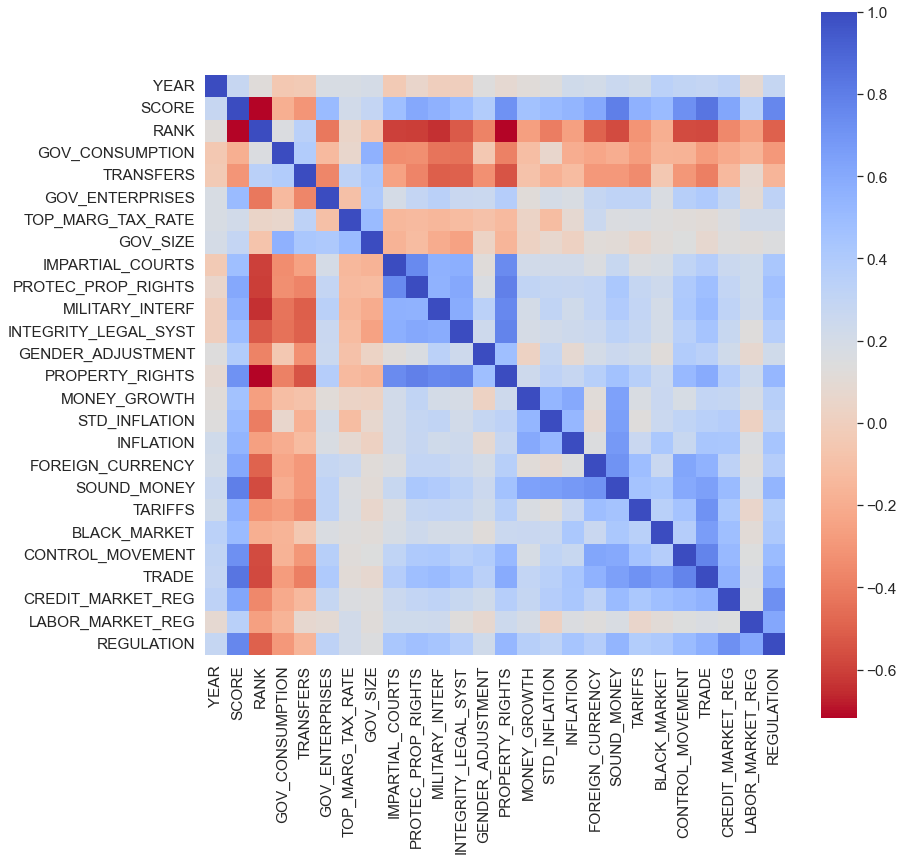

In [48]:
# Numeric Value
data_num = data._get_numeric_data()
data_cor = data_num.corr()

#Plot heatmap
sns.set(font_scale=1.4)

plt.figure(figsize=(13,13))
sns.heatmap(data_cor,  square=True, cmap='coolwarm_r')

This is the matrix corrlation heatmap of all numeric variables, but I'm going to use only the main features.

<AxesSubplot:>

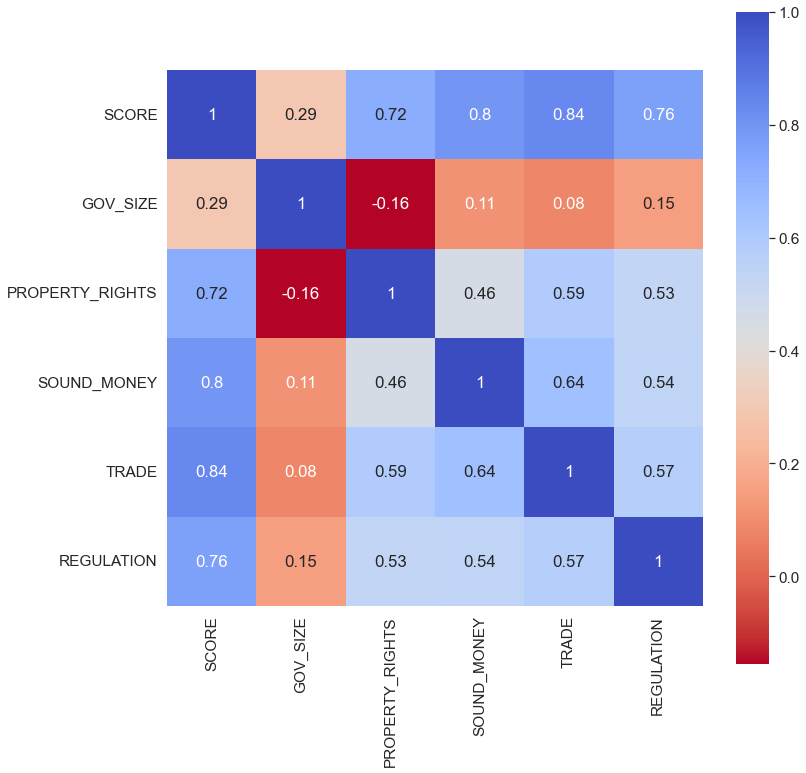

In [49]:
# Main Features
data_num_2 = data[['SCORE', 'GOV_SIZE', 'PROPERTY_RIGHTS', 'SOUND_MONEY', 'TRADE', 'REGULATION']]
data_cor_2 = data_num_2.corr()

sns.set(font_scale=1.4)

plt.figure(figsize=(12,12))
sns.heatmap(data_cor_2,  square=True, annot=True, cmap='coolwarm_r')

Using only the five main features, we can see that most of them are strong correlated to the final score. Except for Goverment Size, that seems not to have a strong relation with the economic index.

### Which Are The Least And Top Economically Free Countries?

The dataset has the index for each country since 1970 to 2016. We can check which ones are on the bottom an on the top of the last year measured.

#### Least 15 Economically Free Countries in 2016

Text(0.5, 1.0, 'Least 15 Economically Free Countries in 2016')

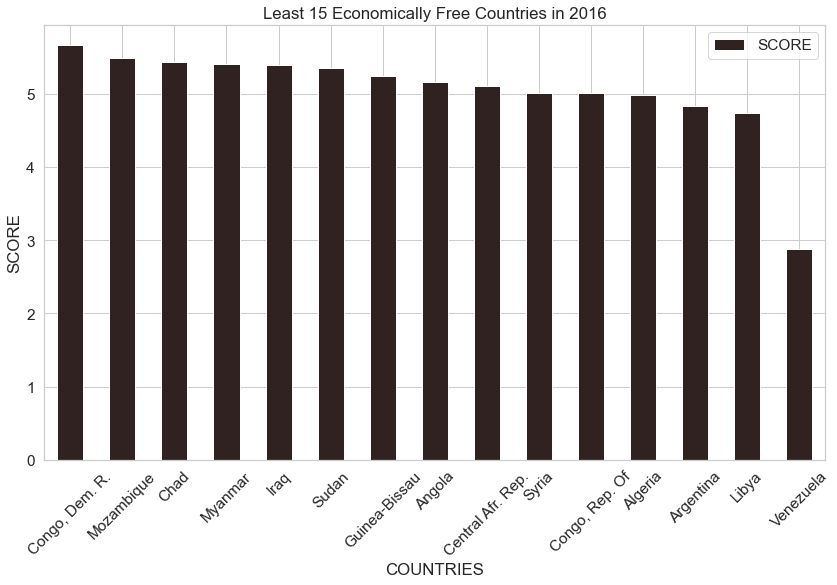

In [55]:
sns.set_palette(sns.dark_palette("red",15, reverse=False))
sns.set_style('whitegrid')

top_15_16_least = data[data.YEAR==2016].sort_values(by='SCORE', ascending=False).tail(15)
top_15_16_least.plot('COUNTRY', 'SCORE', kind='bar', figsize=(14,8), rot=45)

plt.xlabel('COUNTRIES')
plt.ylabel('SCORE')
plt.title('Least 15 Economically Free Countries in 2016')

#### Top 15 Most Economically Free Countries in 2016

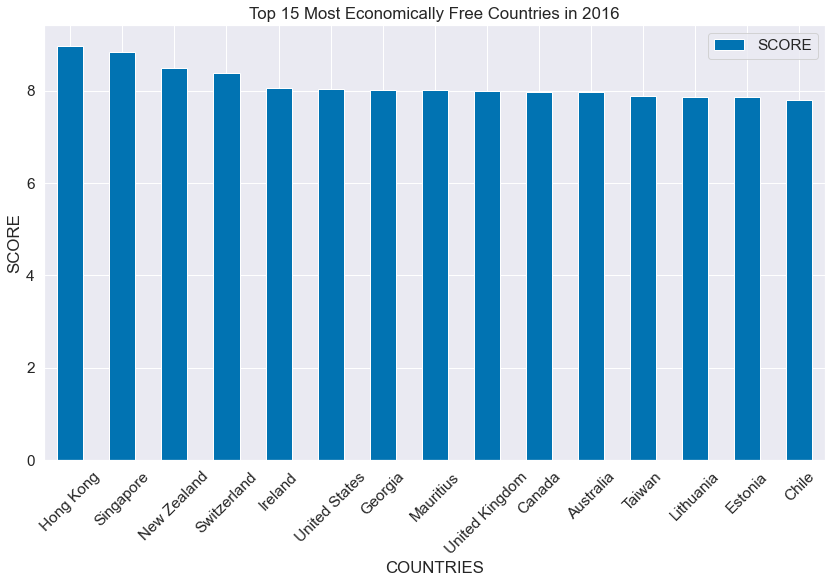

In [363]:
sns.set_palette(sns.color_palette("colorblind",15))
#sns.set_palette(sns.dark_palette("green",15, reverse=False))
sns.set_style('darkgrid')

top_15_2016 = data[data.YEAR==2016].sort_values(by='SCORE', ascending=False).head(15)
top_15_2016.plot('COUNTRY', 'SCORE', kind='bar', figsize=(14,8), rot=45)

plt.xlabel('COUNTRIES')
plt.ylabel('SCORE')
plt.title('Top 15 Most Economically Free Countries in 2016');

#### Were they always like that?

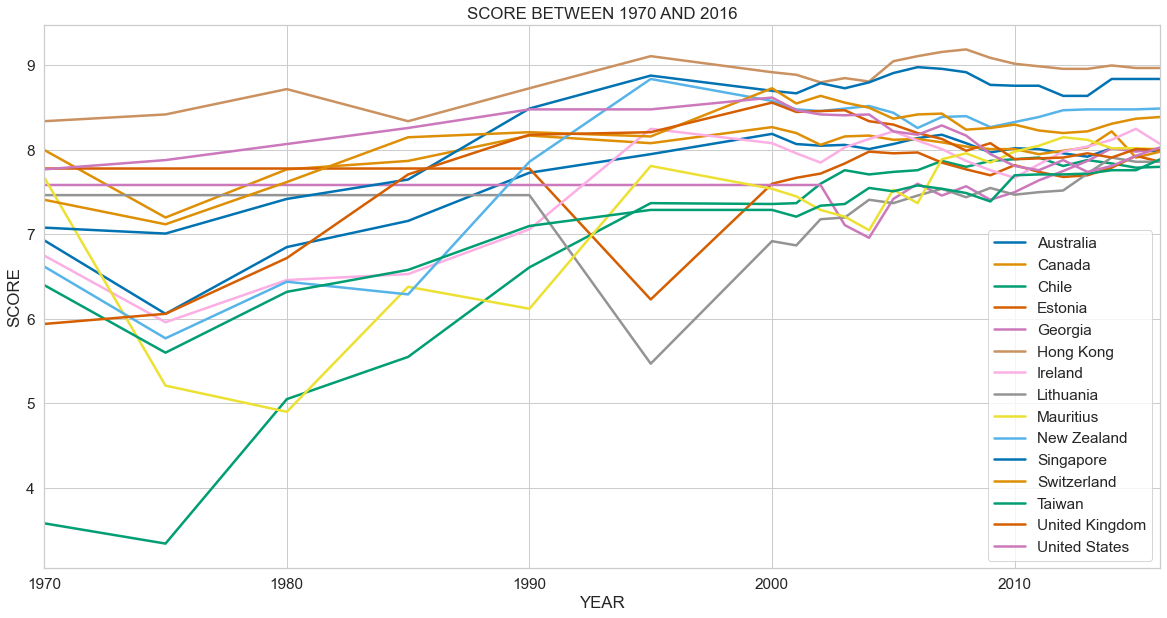

In [196]:
names = top_15_2016['COUNTRY']
top_15 = data[data['COUNTRY'].isin(names)]

sns.set_palette(sns.color_palette("colorblind",15))
sns.set_style('whitegrid')

fig, ax = plt.subplots()

for key, grp in top_15.groupby(['COUNTRY']):
    ax = grp.plot(ax=ax, kind='line', x='YEAR', y='SCORE', label=key, figsize=(20,10), linewidth=2.5)
    
plt.xlim((1970, 2016))
plt.xlabel('YEAR')
plt.ylabel('SCORE')
plt.title('SCORE BETWEEN 1970 AND 2016');

## 5. BRICS & Chile & Peru

Once we talking about country development, I decided to get BRICS' countries and compare them to Chile, which is the region where we saw a huge growth in its index.

For those who are unfamiliar, BRICS is an acronym for the emerging economies of Brazil, Russia, India, China and South Africa. Together they represent about 25% of the world's land mass and more than 40% of its population.

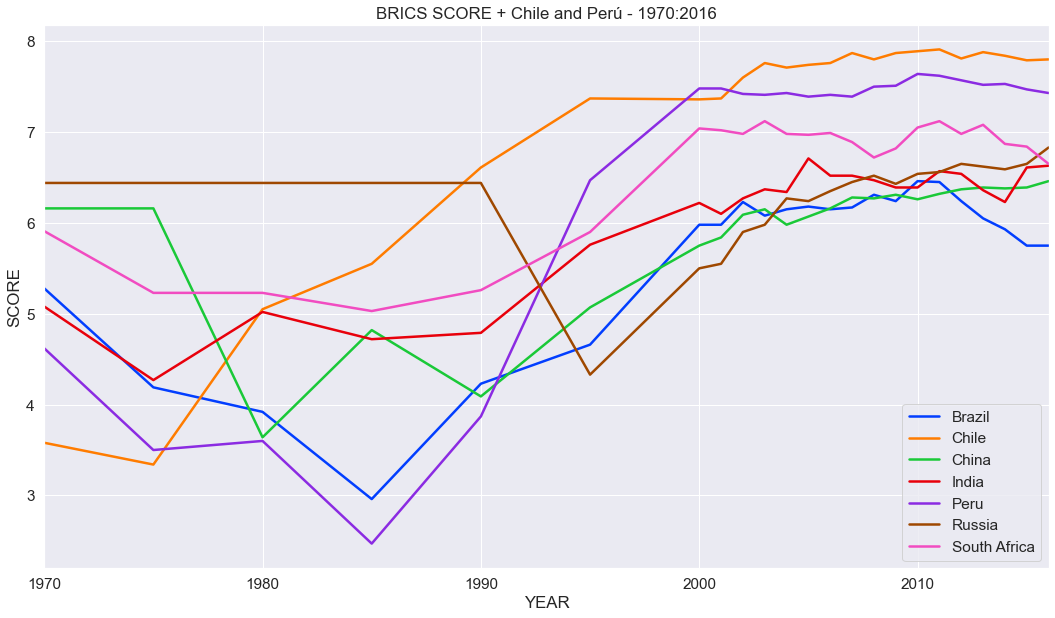

In [354]:
briccs_names = ['Brazil', 'Russia', 'India', 'China', 'Peru', 'Chile', 'South Africa']
briccs = data[data['COUNTRY'].isin(briccs_names)]

sns.set_palette(sns.color_palette("bright",7))
sns.set_style('darkgrid')

fig, ax = plt.subplots()

for key, grp in briccs.groupby(['COUNTRY']):
    ax = grp.plot(ax=ax, kind='line', x='YEAR', label=key, y='SCORE', figsize=(18,10), linewidth=2.5)
    
plt.xlim((1970, 2016))
plt.legend(loc='lower right')
plt.xlabel('YEAR')
plt.ylabel('SCORE')
plt.title('BRICS SCORE + Chile and Perú - 1970:2016');

### Main Economic Freedom Features in BRIC'C'S

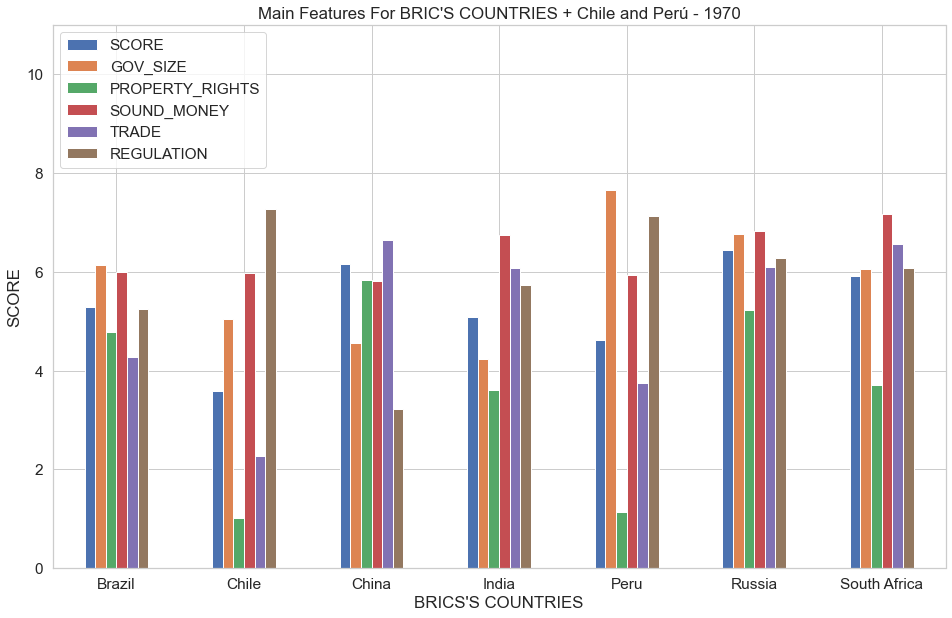

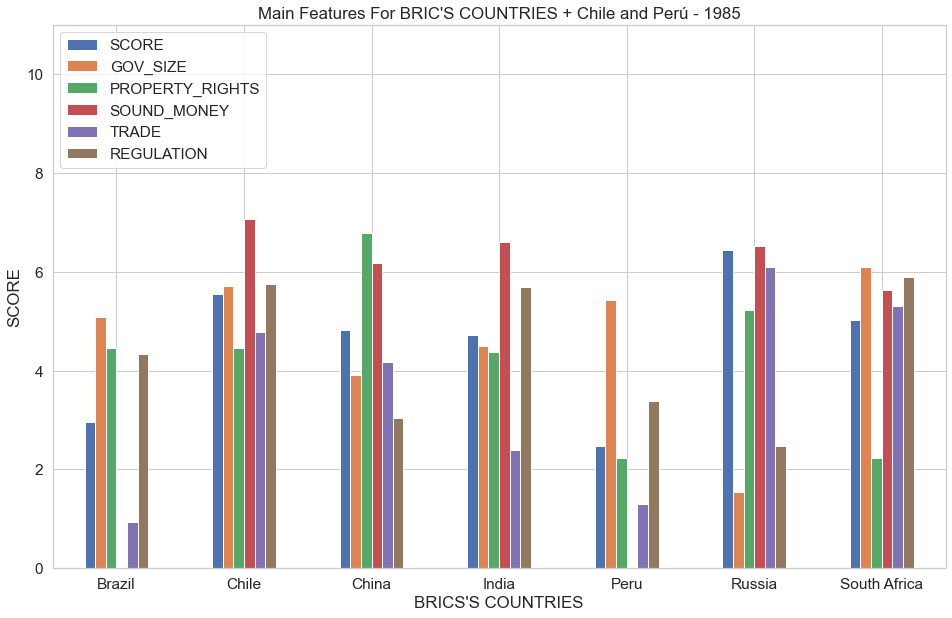

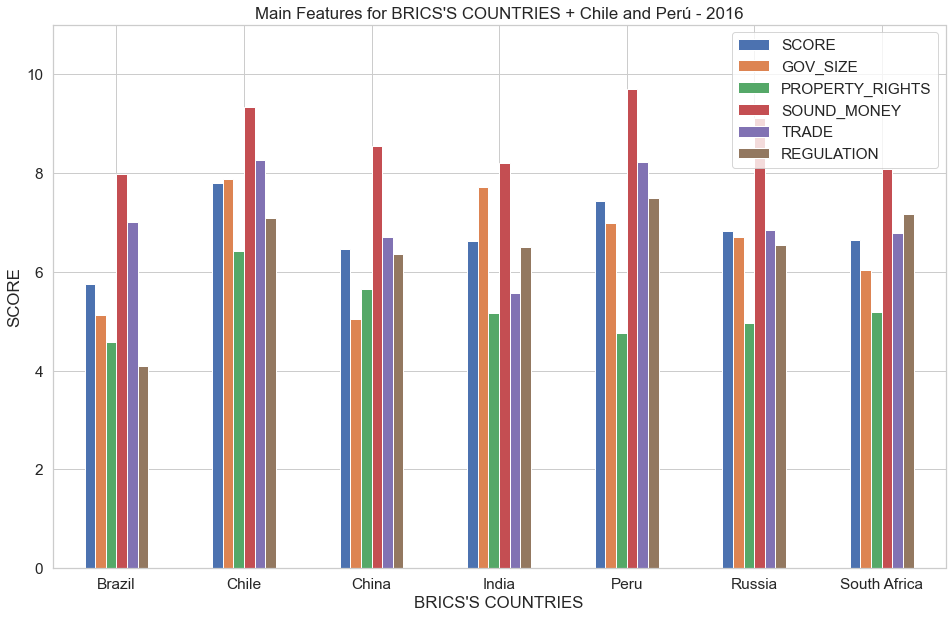

In [341]:
# Separate values from 1970
briccs_1970 = briccs[briccs['YEAR'] == 1970]
main_feat = ['SCORE','GOV_SIZE', 'PROPERTY_RIGHTS', 'SOUND_MONEY', 'TRADE', 'REGULATION']

sns.set(font_scale=1.4)
sns.set_style('whitegrid')
briccs_1970.plot(x='COUNTRY', y=main_feat, kind='bar', rot= 0,figsize=(16,10))
plt.ylim(0,11)
plt.legend(loc='upper left')
plt.xlabel("BRICS'S COUNTRIES")
plt.ylabel("SCORE")
plt.title("Main Features For BRIC'S COUNTRIES + Chile and Perú - 1970")
########################################################################################################################
# Separate values from 1970
briccs_1985 = briccs[briccs['YEAR'] == 1985]

briccs_1985.plot(x='COUNTRY', y=main_feat, kind='bar', rot= 0,figsize=(16,10))
plt.ylim(0,11)
plt.legend(loc='upper left')
plt.xlabel("BRICS'S COUNTRIES")
plt.ylabel("SCORE")
plt.title("Main Features For BRIC'S COUNTRIES + Chile and Perú - 1985")

########################################################################################################################

# Separate values from 2016
briccs_2016 = briccs[briccs['YEAR'] == 2016]

briccs_2016.plot(x='COUNTRY', y=main_feat, kind='bar', rot= 0,figsize=(16,10))
plt.ylim(0,11)
plt.xlabel("BRICS'S COUNTRIES")
plt.ylabel("SCORE")
plt.title("Main Features for BRICS'S COUNTRIES + Chile and Perú - 2016");

Text(0.5, 1.0, 'RELATION BETWEEN SCORE AND PROPERTY_RIGHTS')

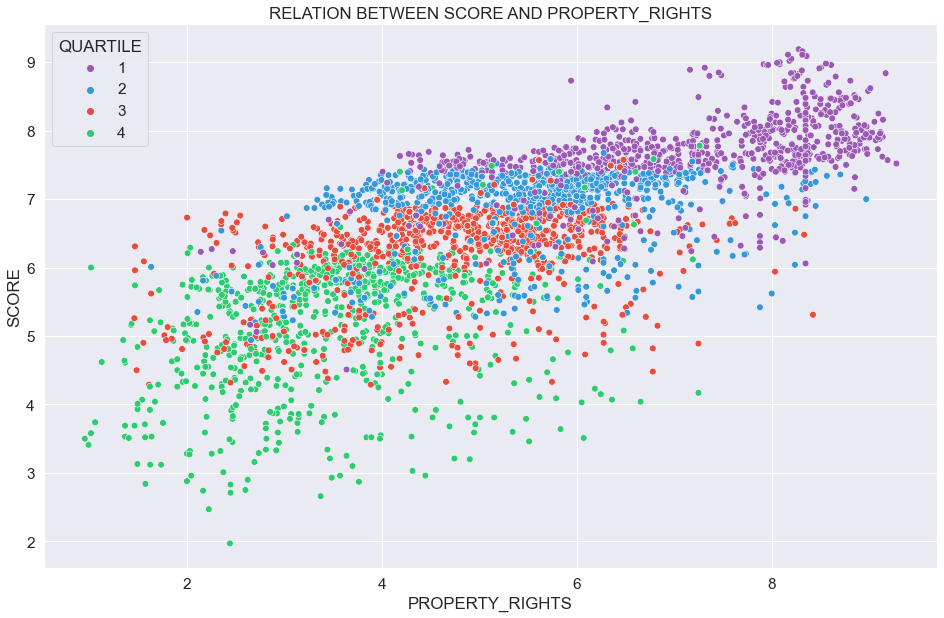

In [204]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

sns.scatterplot(x='PROPERTY_RIGHTS', y='SCORE', data=data, s=45,\
                hue='QUARTILE', palette=["#9b59b6", "#3498db", "#e74c3c", "#2ecc71"])
plt.xlabel('PROPERTY_RIGHTS')
plt.ylabel('SCORE')
plt.title('RELATION BETWEEN SCORE AND PROPERTY_RIGHTS')
# Para usar set_size_inches() se debe usar Get Currente Figure, es decir plt.gcf(), no se puede usar plt.subplots().
# Se usa set_size_inches() para modificar el tamaño de la figura en seaborn cuando es un grafico a nivel de eje.

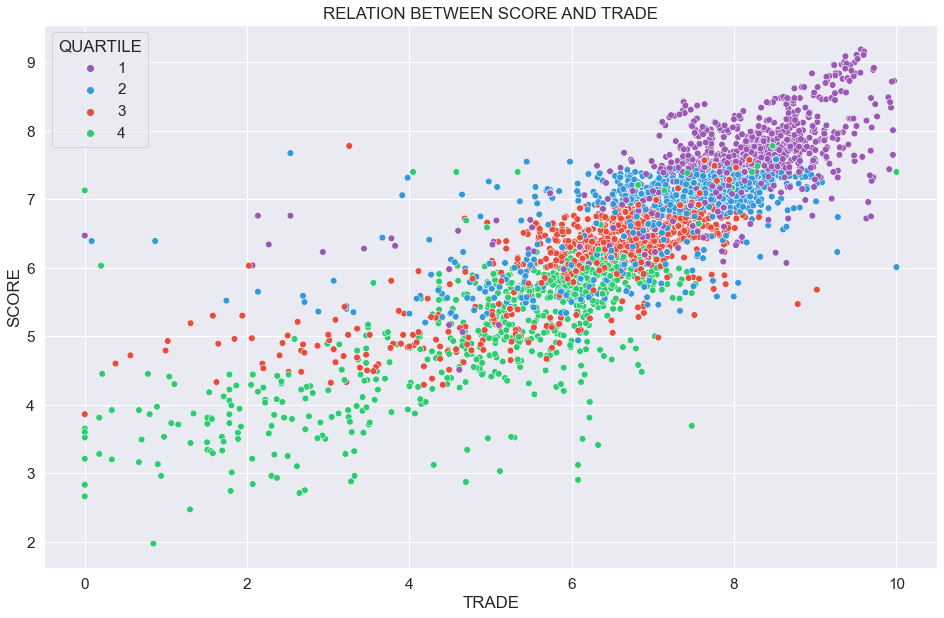

In [212]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

sns.scatterplot(x='TRADE', y='SCORE', data=data, s=45,\
                hue='QUARTILE', palette=["#9b59b6", "#3498db", "#e74c3c", "#2ecc71"])
plt.xlabel('TRADE')
plt.ylabel('SCORE')
plt.title('RELATION BETWEEN SCORE AND TRADE');

As we saw in the correlation matrix heatmap, TRADE and PROPERTY_RIGHTS have a strong positve correlation with the economic freedom SCORE. In other words, the higher the TRADE or PROPERTY RIGHTS the higher the index.

## PERU SCORE

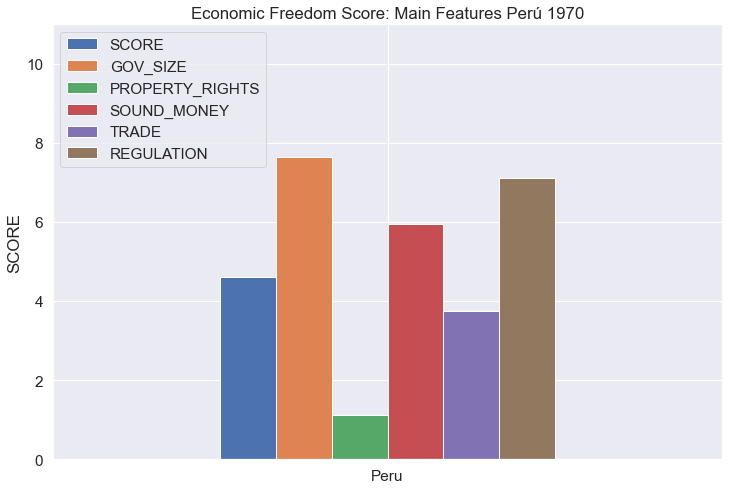

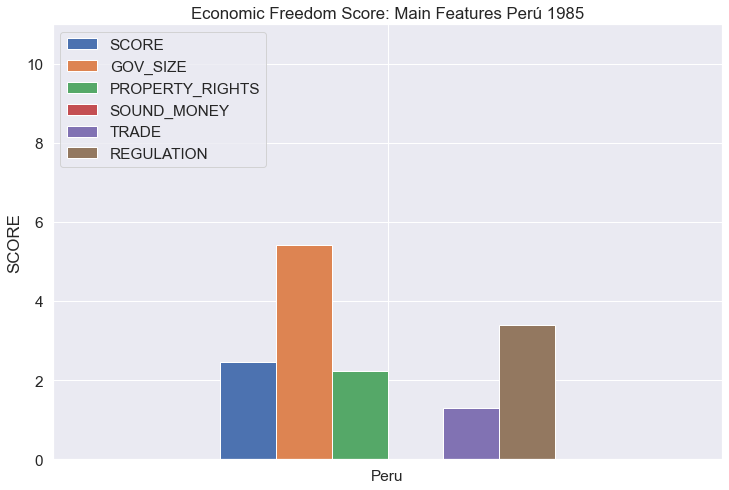

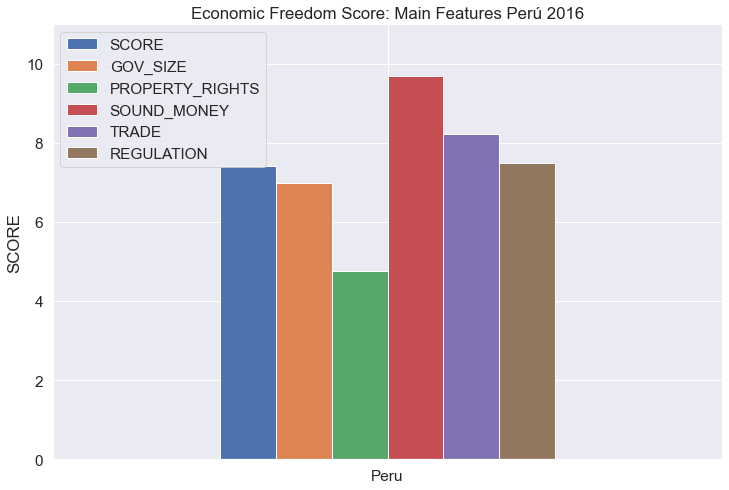

In [356]:
peru = briccs[briccs['COUNTRY'] == 'Peru']
peru_1970 = peru[peru['YEAR'] == 1970]
main_feat = ['SCORE','GOV_SIZE', 'PROPERTY_RIGHTS', 'SOUND_MONEY', 'TRADE', 'REGULATION']

sns.set(font_scale=1.4)
sns.set_style('darkgrid')
peru_1970.plot(x='COUNTRY', y=main_feat, kind='bar', rot= 0,figsize=(12, 8))
plt.ylim(0,11)
plt.legend(loc='upper left')
plt.xlabel("")
plt.ylabel("SCORE")
plt.title("Economic Freedom Score: Main Features Perú 1970")
############################################################
peru = briccs[briccs['COUNTRY'] == 'Peru']
peru_1985 = peru[peru['YEAR'] == 1985]
main_feat = ['SCORE','GOV_SIZE', 'PROPERTY_RIGHTS', 'SOUND_MONEY', 'TRADE', 'REGULATION']

sns.set(font_scale=1.4)
sns.set_style('darkgrid')
peru_1985.plot(x='COUNTRY', y=main_feat, kind='bar', rot= 0,figsize=(12, 8))
plt.ylim(0,11)
plt.legend(loc='upper left')
plt.xlabel("")
plt.ylabel("SCORE")
plt.title("Economic Freedom Score: Main Features Perú 1985")
############################################################
peru = briccs[briccs['COUNTRY'] == 'Peru']
peru_2016 = peru[peru['YEAR'] == 2016]
main_feat = ['SCORE','GOV_SIZE', 'PROPERTY_RIGHTS', 'SOUND_MONEY', 'TRADE', 'REGULATION']

sns.set(font_scale=1.4)
sns.set_style('darkgrid')
peru_2016.plot(x='COUNTRY', y=main_feat, kind='bar', rot= 0,figsize=(12, 8))
plt.ylim(0,11)
plt.legend(loc='upper left')
plt.xlabel("")
plt.ylabel("SCORE")
plt.title("Economic Freedom Score: Main Features Perú 2016");

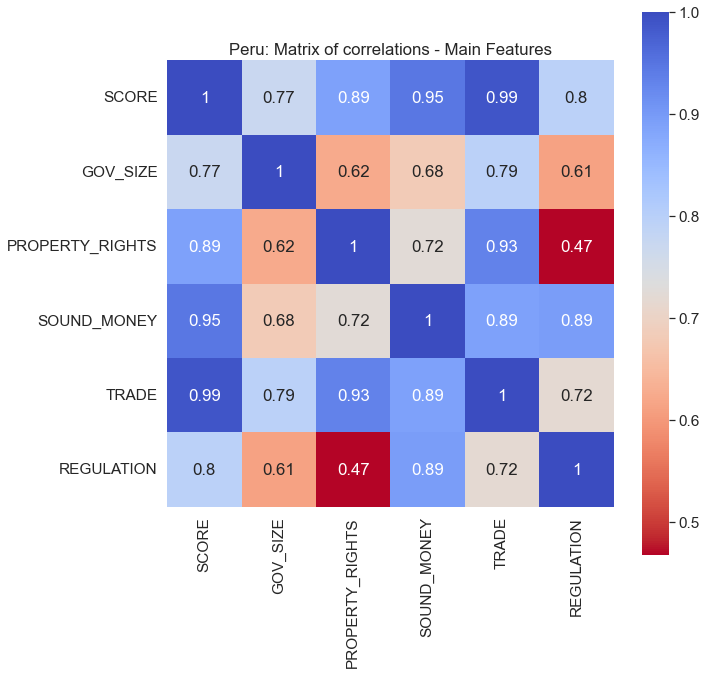

In [353]:
# Main Features
peru_num = peru[['SCORE', 'GOV_SIZE', 'PROPERTY_RIGHTS', 'SOUND_MONEY', 'TRADE', 'REGULATION']]
peru_corr = peru_num.corr()
sns.set_style('darkgrid')
sns.set(font_scale=1.4)

plt.figure(figsize=(10,10))

sns.heatmap(peru_corr,  square=True, annot=True, cmap='coolwarm_r')
plt.title("Peru: Matrix of correlations - Main Features");

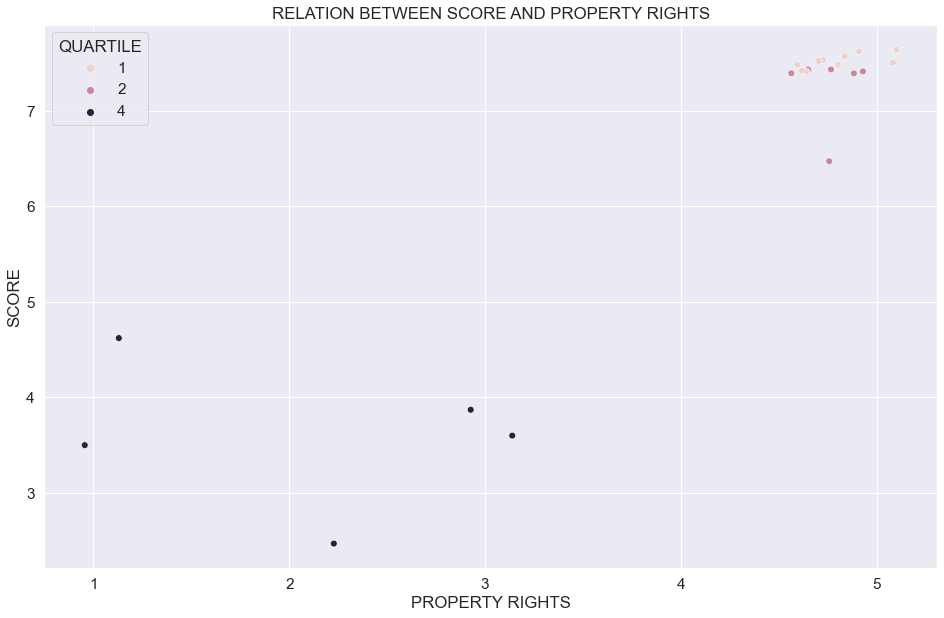

In [125]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

#peru.QUARTILE = peru.QUARTILE.astype('int64')

sns.scatterplot(x='PROPERTY_RIGHTS', y='SCORE', data=peru, s=45,hue='QUARTILE')
plt.xlabel('PROPERTY RIGHTS')
plt.ylabel('SCORE')
plt.title('RELATION BETWEEN SCORE AND PROPERTY RIGHTS');

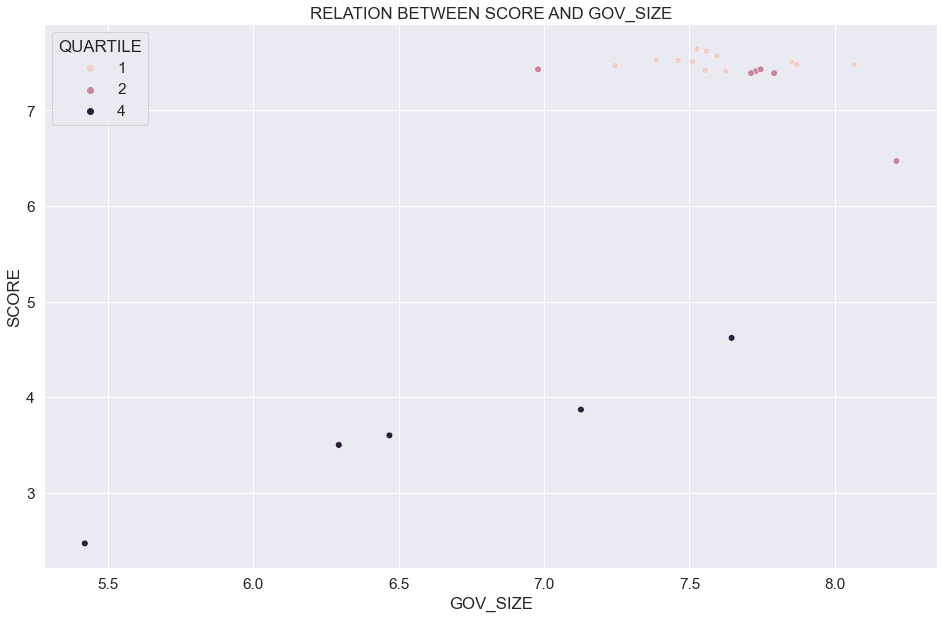

In [131]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

#peru.QUARTILE = peru.QUARTILE.astype('int64')

sns.scatterplot(x='GOV_SIZE', y='SCORE', data=peru, s=45,hue='QUARTILE')
plt.xlabel('GOV_SIZE')
plt.ylabel('SCORE')
plt.title('RELATION BETWEEN SCORE AND GOV_SIZE');

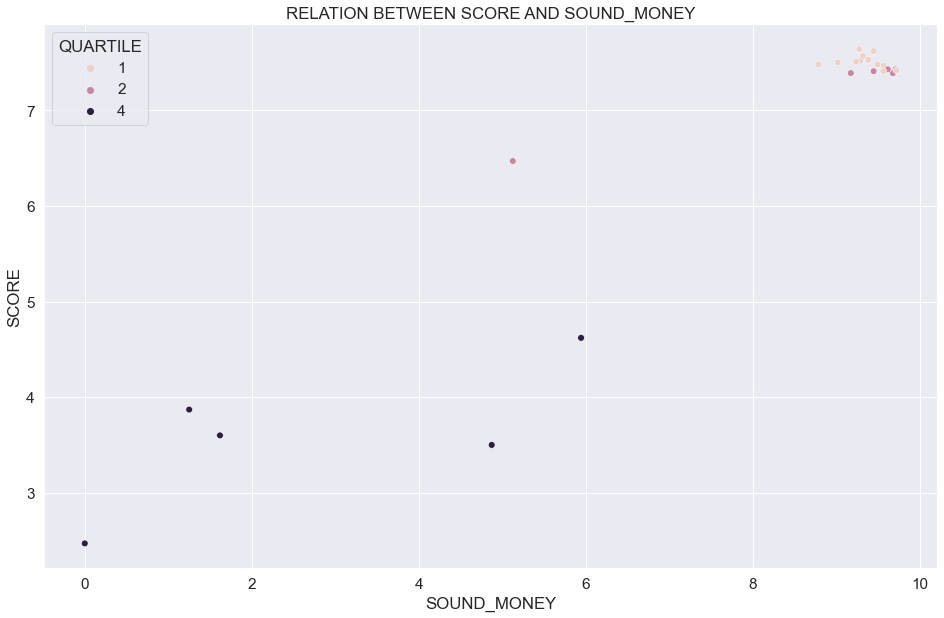

In [132]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

#peru.QUARTILE = peru.QUARTILE.astype('int64')

sns.scatterplot(x='SOUND_MONEY', y='SCORE', data=peru, s=45,hue='QUARTILE')
plt.xlabel('SOUND_MONEY')
plt.ylabel('SCORE')
plt.title('RELATION BETWEEN SCORE AND SOUND_MONEY');

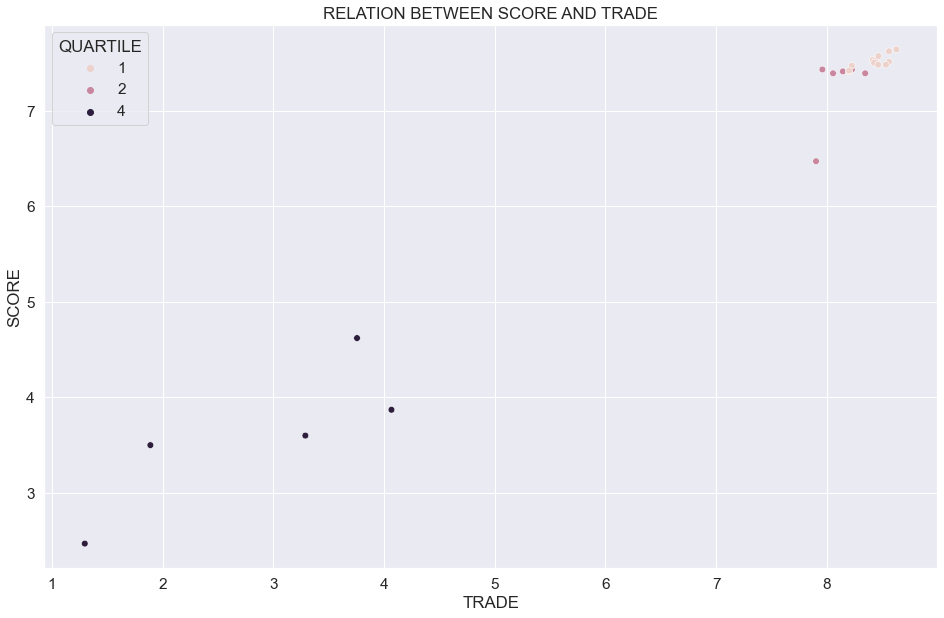

In [133]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

#peru.QUARTILE = peru.QUARTILE.astype('int64')

sns.scatterplot(x='TRADE', y='SCORE', data=peru, s=45,hue='QUARTILE')
plt.xlabel('TRADE')
plt.ylabel('SCORE')
plt.title('RELATION BETWEEN SCORE AND TRADE');

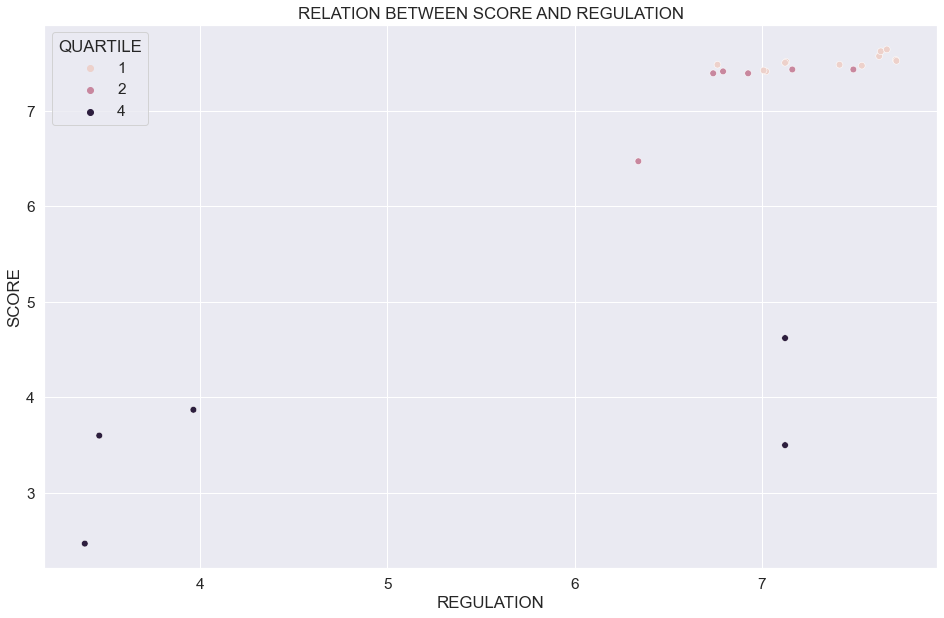

In [134]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

#peru.QUARTILE = peru.QUARTILE.astype('int64')

sns.scatterplot(x='REGULATION', y='SCORE', data=peru, s=45,hue='QUARTILE')
plt.xlabel('REGULATION')
plt.ylabel('SCORE')
plt.title('RELATION BETWEEN SCORE AND REGULATION');

## 6. Human Development Index

In [ ]:
## VER SI SE INCLUYE EN EL ANALISIS EL PBI PARA EL CASO PERUANO. Y VER LA CORRELACION DEL PBI CON SCORE DE LIBERTAD ECONOMICA

"The Human Development Index (HDI) is a summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living. The HDI is the geometric mean of normalized indices for each of the three dimensions."(Human Development Reports)

### Importing Data

In [169]:
path_2 = "./EF_HDI/Human Development Index.csv"
hdi = pd.read_csv(path_2)

In [170]:
print('Dimensions:',hdi.shape)

Dimensions: (189, 30)


In [171]:
hdi.head(10)
# We're going to reshape it in 3 columns

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,168,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.437,0.453,0.463,0.471,0.482,0.487,0.491,0.493,0.494,0.498
1,68,Albania,0.645,0.626,0.610,0.613,0.619,0.632,0.641,0.641,...,0.724,0.729,0.741,0.752,0.767,0.771,0.773,0.776,0.782,0.785
2,85,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.608,0.617,...,0.709,0.719,0.729,0.736,0.740,0.745,0.747,0.749,0.753,0.754
3,35,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.831,0.830,0.828,0.827,0.849,0.850,0.853,0.854,0.856,0.858
4,147,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.502,0.522,0.520,0.535,0.543,0.554,0.564,0.572,0.577,0.581
5,70,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.777,0.770,0.766,0.762,0.765,0.768,0.770,0.775,0.778,0.780
6,47,Argentina,0.704,0.713,0.720,0.725,0.728,0.731,0.738,0.746,...,0.795,0.799,0.813,0.819,0.818,0.820,0.820,0.822,0.822,0.825
7,83,Armenia,0.631,0.628,0.580,0.588,0.599,0.605,0.612,0.623,...,0.727,0.724,0.728,0.731,0.737,0.742,0.745,0.748,0.749,0.755
8,3,Australia,0.866,0.867,0.868,0.872,0.875,0.883,0.886,0.889,...,0.920,0.921,0.923,0.925,0.929,0.931,0.933,0.936,0.938,0.939
9,20,Austria,0.795,0.800,0.805,0.807,0.813,0.817,0.820,0.824,...,0.884,0.886,0.895,0.897,0.899,0.897,0.901,0.903,0.906,0.908


In [172]:
hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HDI Rank  189 non-null    int64  
 1   Country   189 non-null    object 
 2   1990      142 non-null    float64
 3   1991      143 non-null    float64
 4   1992      140 non-null    float64
 5   1993      143 non-null    float64
 6   1994      143 non-null    float64
 7   1995      147 non-null    float64
 8   1996      147 non-null    float64
 9   1997      147 non-null    float64
 10  1998      147 non-null    float64
 11  1999      150 non-null    float64
 12  2000      172 non-null    float64
 13  2001      172 non-null    float64
 14  2002      174 non-null    float64
 15  2003      176 non-null    float64
 16  2004      179 non-null    float64
 17  2005      186 non-null    float64
 18  2006      186 non-null    float64
 19  2007      186 non-null    float64
 20  2008      186 non-null    float6

### Cleaning Data

In [173]:
# First I'm going to drop the Rank column, that won't be needed
hdi = hdi.drop(columns='HDI Rank')

In [174]:
# Then reshape the df in 3 columns
hdi = pd.melt(frame=hdi, id_vars='Country')

hdi.rename(columns={'Country': 'COUNTRY',
                   'variable': 'YEAR',
                   'value': 'INDEX'}, inplace=True)
hdi.YEAR = hdi.YEAR.astype('float')

In [175]:
hdi.head()

,COUNTRY,YEAR,INDEX
0,Afghanistan,1990.0,NaN
1,Albania,1990.0,0.645
2,Algeria,1990.0,0.577
3,Andorra,1990.0,NaN
4,Angola,1990.0,NaN


In [176]:
hdi.shape

(5292, 3)

### Filling Missing Data

As we did with the first dataset, the NaN values will be replaced with countries median

In [180]:
hdi[['INDEX']] = hdi.groupby('COUNTRY')[['INDEX']].transform(lambda x: x.fillna(x.median())) 

In [181]:
hdi[['INDEX']]

,INDEX
0,0.458
1,0.645
2,0.577
3,0.829
4,0.502
...,...
5287,0.761
5288,0.694
5289,0.452
5290,0.588


In [183]:
hdi.head()

,COUNTRY,YEAR,INDEX
0,Afghanistan,1990.0,0.458
1,Albania,1990.0,0.645
2,Algeria,1990.0,0.577
3,Andorra,1990.0,0.829
4,Angola,1990.0,0.502


In [182]:
hdi.isnull().sum()

COUNTRY    0
YEAR       0
INDEX      0
dtype: int64

### Dealing With Strings

The datasets are going to be merged by Country name, but we can see that in some country names they appear differently from one dataset to the other. So here, we're going to remove everything after the name of the country.

In [184]:
hdi['new'] = hdi['COUNTRY'].str.split(',').str[0]
# str.split(','), separa los carateres del string

In [185]:
hdi.head()

,COUNTRY,YEAR,INDEX,new
0,Afghanistan,1990.0,0.458,Afghanistan
1,Albania,1990.0,0.645,Albania
2,Algeria,1990.0,0.577,Algeria
3,Andorra,1990.0,0.829,Andorra
4,Angola,1990.0,0.502,Angola


In [186]:
hdi['COUNTRY'] = hdi['new'].str.split('(').str[0]

In [187]:
hdi.head()

,COUNTRY,YEAR,INDEX,new
0,Afghanistan,1990.0,0.458,Afghanistan
1,Albania,1990.0,0.645,Albania
2,Algeria,1990.0,0.577,Algeria
3,Andorra,1990.0,0.829,Andorra
4,Angola,1990.0,0.502,Angola


In [188]:
hdi = hdi.drop(columns='new')
hdi.COUNTRY = hdi.COUNTRY.str.strip()
# str.strip(), elimina carateres iniciales y finales y espacios en blanco.

In [189]:
hdi['COUNTRY'] = hdi['COUNTRY'].replace({'Russian Federation': 'Russia'})

In [191]:
hdi.head()

,COUNTRY,YEAR,INDEX
0,Afghanistan,1990.0,0.458
1,Albania,1990.0,0.645
2,Algeria,1990.0,0.577
3,Andorra,1990.0,0.829
4,Angola,1990.0,0.502


### A BRIEF EDA...

Before the comparison, let's first explore the data and check if we can spot some similarities with the first one.

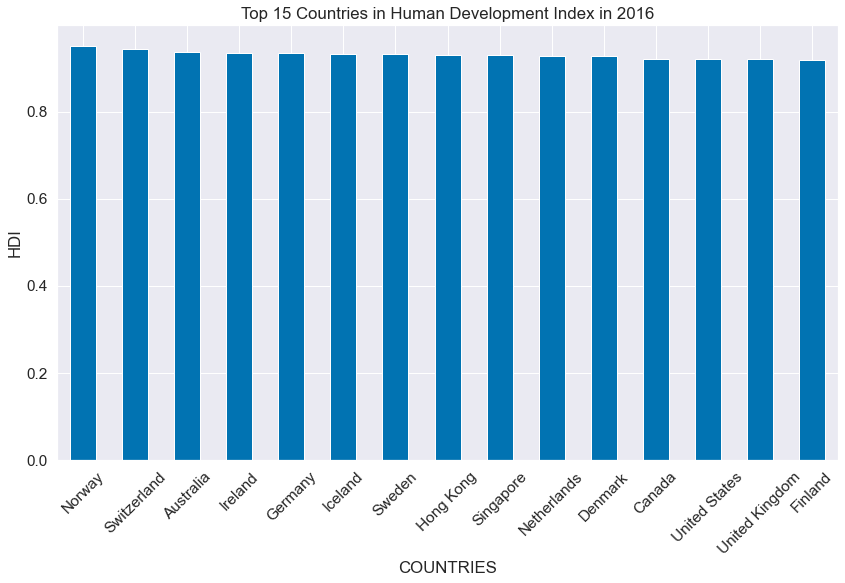

In [366]:
sns.set_palette(sns.color_palette("colorblind",15))
sns.set_style('darkgrid')

hdi_15_17 = hdi[hdi.YEAR==2016].sort_values(by='INDEX', ascending=False).head(15)
hdi_15_17.plot('COUNTRY', 'INDEX', kind='bar', figsize=(14,8), rot=45, legend=None)

plt.xlabel('COUNTRIES')
plt.ylabel('HDI')
plt.title('Top 15 Countries in Human Development Index in 2016');

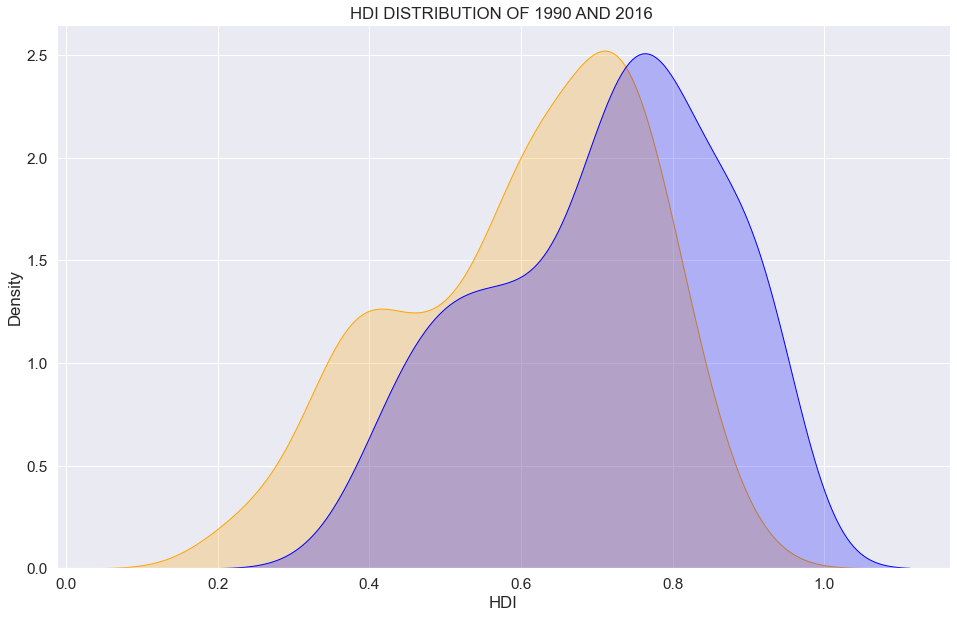

In [215]:
hdi_2016 = hdi[hdi.YEAR==2016]
hdi_1990 = hdi[hdi.YEAR==1990] 

sns.set_style('darkgrid')

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.kdeplot(hdi_1990.INDEX, shade=True, color= "orange", legend= None)
sns.kdeplot(hdi_2016.INDEX, shade=True, color= "blue", legend= None)

plt.xlabel('HDI')
plt.title('HDI DISTRIBUTION OF 1990 AND 2016 ');

From 1990 to 2016 we can see that the average countries HDI has grown

## 7. Merging Data Frames

In [216]:
# Get only the main columns of the Economic data
econ = data[['YEAR', 'COUNTRY', 'SCORE','QUARTILE','GOV_SIZE', 'PROPERTY_RIGHTS', 'SOUND_MONEY', 'TRADE', 'REGULATION']]

In [239]:
# And then merge both data on Country and Year
hdi_econ = hdi.merge(econ, how='left', on=['COUNTRY', 'YEAR'])

In [240]:
hdi_econ.head()

,COUNTRY,YEAR,INDEX,SCORE,QUARTILE,GOV_SIZE,PROPERTY_RIGHTS,SOUND_MONEY,TRADE,REGULATION
0,Afghanistan,1990.0,0.458,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,1990.0,0.645,4.58,4.0,4.193025,5.116111,6.539933,6.818222,2.473200
2,Algeria,1990.0,0.577,3.33,4.0,4.595732,2.918502,4.500539,1.693333,2.933401
3,Andorra,1990.0,0.829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,1990.0,0.502,5.15,4.0,5.117655,3.165813,5.588416,6.032451,5.344041


In [241]:
print('Dimensions:',hdi_econ.shape)

Dimensions: (5292, 10)


These datasets don't have the same countries and years. Now we just remove the NaN values.

In [242]:
hdi_econ = hdi_econ.dropna()
hdi_econ.describe()

,YEAR,INDEX,SCORE,QUARTILE,GOV_SIZE,PROPERTY_RIGHTS,SOUND_MONEY,TRADE,REGULATION
count,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000
mean,2006.368421,0.676996,6.667587,2.508399,6.393739,5.305535,7.871660,6.937545,6.814850
std,6.691466,0.166310,0.995429,1.110672,1.370175,1.708013,1.654102,1.390157,1.122411
min,1990.000000,0.209000,2.660000,1.000000,1.237392,1.463109,0.000000,0.000000,1.002000
25%,2002.000000,0.554000,6.030000,2.000000,5.382875,3.995512,6.864769,6.155805,6.169316
50%,2007.000000,0.707000,6.800000,3.000000,6.438235,5.251258,8.157258,7.076598,6.873963
75%,2012.000000,0.803000,7.370000,3.000000,7.399037,6.348426,9.276806,7.919850,7.540125
max,2016.000000,0.951000,9.190000,4.000000,9.904651,9.278333,9.922187,9.970370,9.439828


In [247]:
hdi_econ.head()

,COUNTRY,YEAR,INDEX,SCORE,QUARTILE,GOV_SIZE,PROPERTY_RIGHTS,SOUND_MONEY,TRADE,REGULATION
1,Albania,1990.0,0.645,4.58,4.0,4.193025,5.116111,6.539933,6.818222,2.473200
2,Algeria,1990.0,0.577,3.33,4.0,4.595732,2.918502,4.500539,1.693333,2.933401
4,Angola,1990.0,0.502,5.15,4.0,5.117655,3.165813,5.588416,6.032451,5.344041
6,Argentina,1990.0,0.704,4.47,4.0,6.175950,5.696758,2.500000,4.397778,3.577419
7,Armenia,1990.0,0.631,7.57,4.0,7.880651,5.613138,9.209705,7.635127,7.238780


In [250]:
peru_econ = hdi_econ[hdi_econ['COUNTRY']== 'Peru']
peru_econ.head()

,COUNTRY,YEAR,INDEX,SCORE,QUARTILE,GOV_SIZE,PROPERTY_RIGHTS,SOUND_MONEY,TRADE,REGULATION
134,Peru,1990.0,0.611,3.87,4.0,7.126905,2.926218,1.250000,4.066667,3.964946
1079,Peru,1995.0,0.643,6.47,2.0,8.211755,4.756784,5.125011,7.902361,6.340629
2024,Peru,2000.0,0.678,7.48,1.0,8.067409,4.594154,8.786208,8.534155,7.414789
2213,Peru,2001.0,0.686,7.48,1.0,7.868890,4.802236,9.491136,8.463397,6.763292
2402,Peru,2002.0,0.687,7.42,1.0,7.554912,4.616535,9.717052,8.201303,7.009501


## 8. Relation Between HDI And Economic Freedom

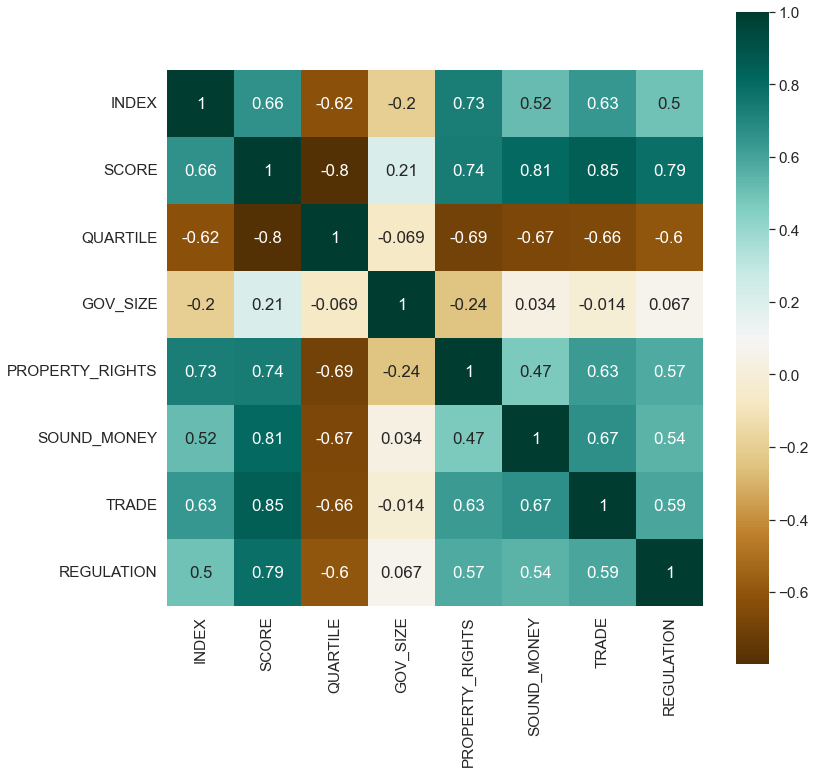

In [246]:
hdi_econ_num = hdi_econ.drop(['COUNTRY', 'YEAR'], axis=1)
hdi_econ_cor = hdi_econ_num.corr()

sns.set(font_scale=1.4)

plt.figure(figsize=(12,12))
sns.heatmap(hdi_econ_cor,  square=True, annot=True, cmap='BrBG');

Text(0.5, 1.0, 'RELATION BETWEEN HDI AND ECONOMIC FREEDOM')

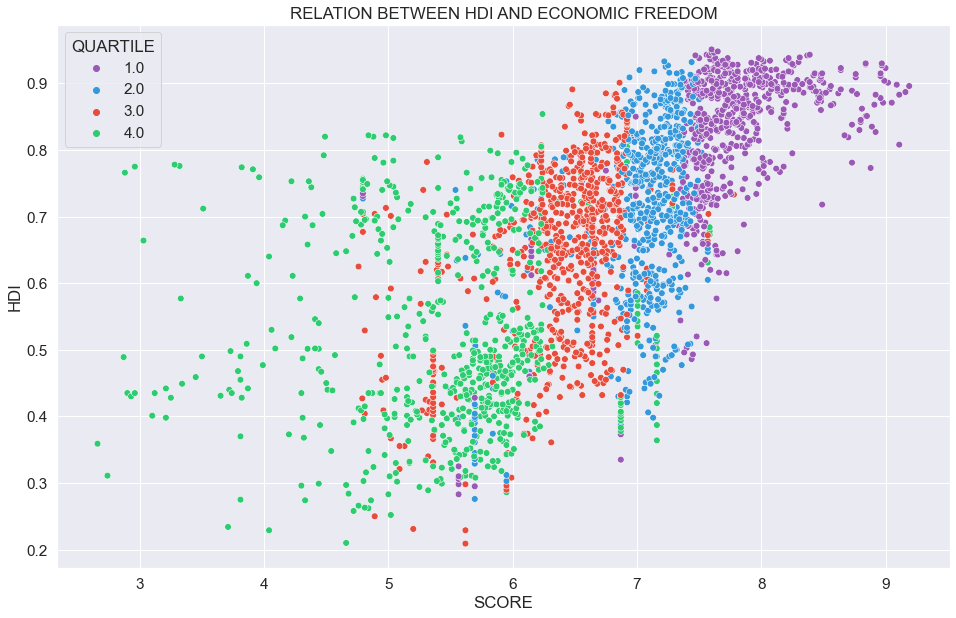

In [224]:
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.set(font_scale=1.4)

sns.scatterplot(x='SCORE', y='INDEX', hue='QUARTILE',
                data=hdi_econ, s=45, palette=["#9b59b6", "#3498db", "#e74c3c", "#2ecc71"])

plt.ylabel('HDI')
plt.title('RELATION BETWEEN HDI AND ECONOMIC FREEDOM')

### BRIC'C'S One More Time...

We already saw how the BRICS countries and Chile changed their economic freedom along the years, specially Chile going from one of the least economic free coutries in 1970 to the top 15 in 2016.

But does it mean that Chile's HDI has also grown?

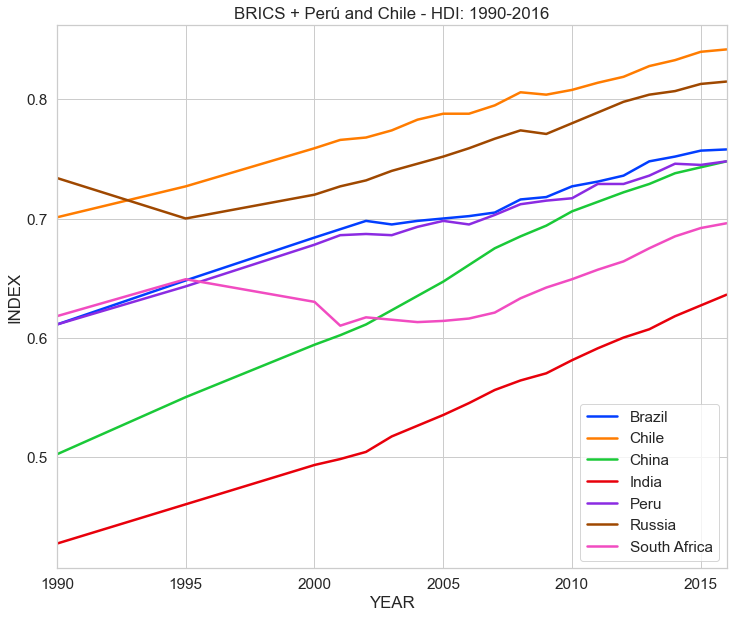

In [333]:
briccs_names = ['Brazil', 'Russia', 'India', 'China', 'Chile', 'Peru','South Africa']
briccs_hdi = hdi_econ.loc[hdi_econ['COUNTRY'].isin(briccs_names)]

sns.set_palette(sns.color_palette("bright",7))
sns.set_style('whitegrid')

fig, ax = plt.subplots()

for key, grp in briccs_hdi.groupby(['COUNTRY']):
    ax = grp.plot(ax=ax, kind='line', x='YEAR', y='INDEX', label=key, figsize=(12,10), linewidth=2.5)
    
plt.xlim((1990, 2016))
plt.legend(loc='lower right')
plt.xlabel('YEAR')
plt.ylabel('INDEX')
plt.title('BRICS + Perú and Chile - HDI: 1990-2016');

### Peru HDI and SCORE

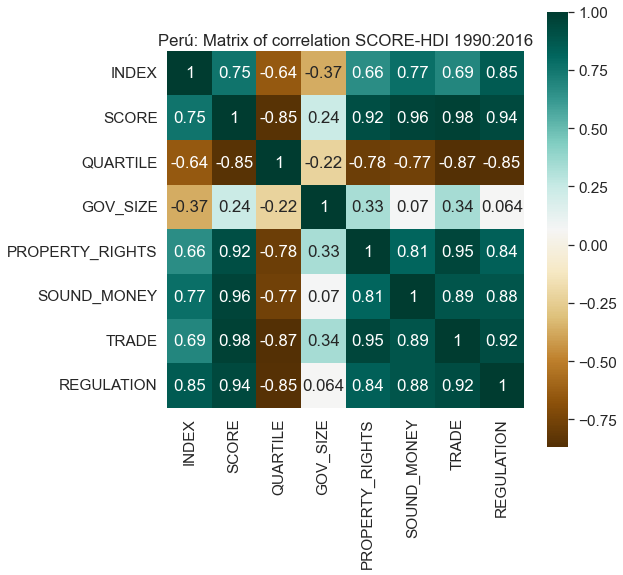

In [355]:
peru_econ = hdi_econ[hdi_econ['COUNTRY']== 'Peru']
peru_econ_num = peru_econ.drop(['COUNTRY', 'YEAR'], axis=1)
peru_econ_cor = peru_econ_num.corr()

sns.set(font_scale=1.4)

plt.figure(figsize=(8,8))
sns.heatmap(peru_econ_cor,  square=True, annot=True, cmap='BrBG')
plt.title('Perú: Matrix of correlation SCORE-HDI 1990:2016');

In [263]:
peru_econ.head()

,COUNTRY,YEAR,INDEX,SCORE,QUARTILE,GOV_SIZE,PROPERTY_RIGHTS,SOUND_MONEY,TRADE,REGULATION
134,Peru,1990.0,0.611,3.87,4.0,7.126905,2.926218,1.250000,4.066667,3.964946
1079,Peru,1995.0,0.643,6.47,2.0,8.211755,4.756784,5.125011,7.902361,6.340629
2024,Peru,2000.0,0.678,7.48,1.0,8.067409,4.594154,8.786208,8.534155,7.414789
2213,Peru,2001.0,0.686,7.48,1.0,7.868890,4.802236,9.491136,8.463397,6.763292
2402,Peru,2002.0,0.687,7.42,1.0,7.554912,4.616535,9.717052,8.201303,7.009501


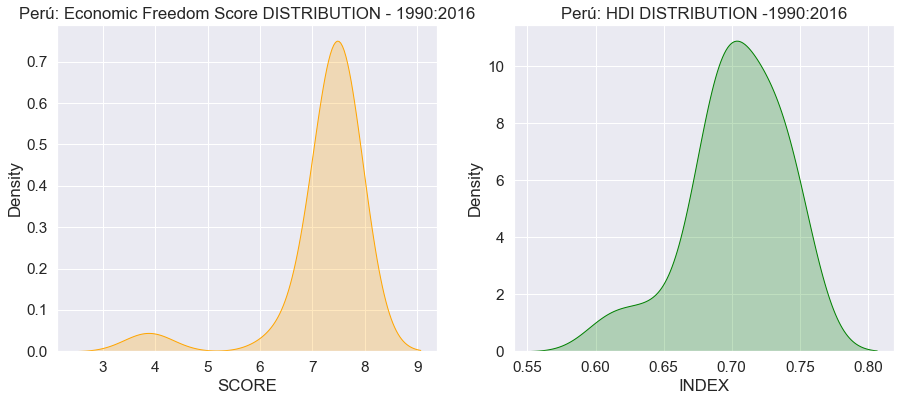

In [351]:
f, plt.subplots(1, 2, figsize=(15, 6), gridspec_kw=dict(width_ratios=[7, 7]))
plt.subplot(1,2,1)
sns.kdeplot(peru_econ.SCORE, shade=True, color= "orange", legend= None)
plt.title('Perú: Economic Freedom Score DISTRIBUTION - 1990:2016')
plt.subplot(1,2,2)
sns.kdeplot(peru_econ.INDEX, shade=True, color= "green", legend= None)
plt.title('Perú: HDI DISTRIBUTION -1990:2016')

f.tight_layout();

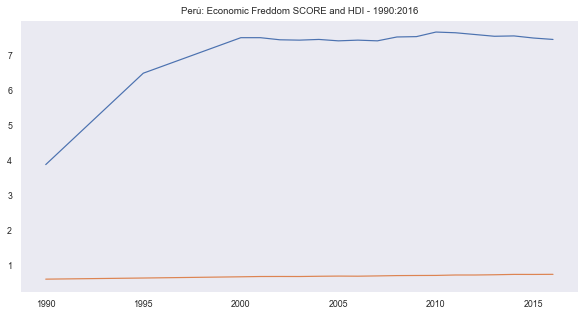

In [335]:
plt.figure(figsize=(10,5))
sns.set(context='paper', style='dark', palette='deep', font_scale=1, color_codes='r') 
plt.plot('YEAR', 'SCORE', data=peru_econ)
plt.plot('YEAR', 'INDEX', data=peru_econ)
plt.title('Perú: Economic Freddom SCORE and HDI - 1990:2016');

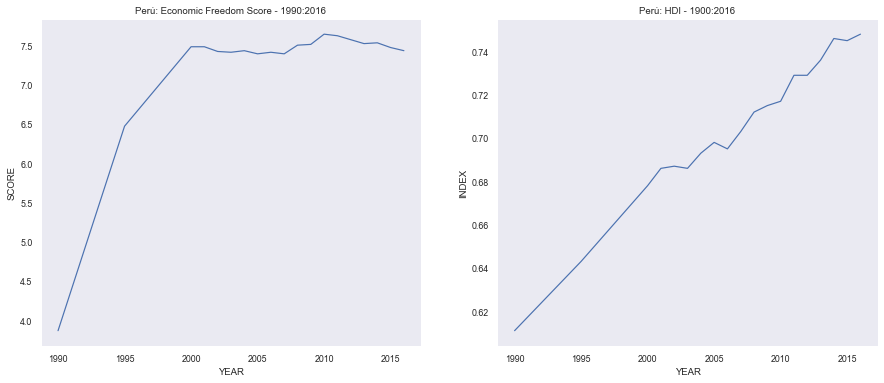

In [321]:
f, plt.subplots(1, 2, figsize=(15, 6), gridspec_kw=dict(width_ratios=[7, 7]))
plt.subplot(1,2,1)
sns.lineplot(data=peru_econ, x="YEAR", y="SCORE")
plt.title('Perú: Economic Freedom Score - 1990:2016')
plt.subplot(1,2,2)
sns.lineplot(data=peru_econ, x="YEAR", y='INDEX')
plt.title('Perú: HDI - 1900:2016')

f.tight_layout();

## 9. Hallazgos

La evidencia muestra que no se puede hablar de libertad económica en general si se quiere observar beneficios de ella con respecto al desarrollo humano en el Perú. Para lo cual se debe diferenciar entre las políticas (indicadores) que incrementan la libertad económica y las que tienen un mayor efecto en el Índice de desarrollo humano del país. Con respecto a las variables que incrementan el SCORE de Libertad Económica, destacan en el país por orden de magnitud la estabilidad monetaria, la apertura comercial y la regulación. Por el lado del efecto entre libertad económica y desarrollo humano, existe relación positiva alta con la regulación, la estabilidad monetaria y la apertura comercial, en ese orden, y es este segundo caso el que debe considerarse en cuanto a la formulación de políticas. Es importante señalar también que los derechos de propiedad tienen una baja correlación positiva con el desarrollo, mientras que el indicador tamaño de gobierno tiene un efecto negativo en el IDH, por lo que insistir en políticas para reducirlo (e incrementar el SCORE por ese lado) no tiene mayor sustento. Las cifras han servido también para refutar o poner en duda alguna de las ideas fuerza que los políticos han venido propalando en las últimas décadas, al etiquetar a los distintos gobiernos con algunas ideologías y resultados de sus políticas. Así tenemos que según las cifras que miden el SCORE, el gobierno de Velasco tuvo una mayor libertad económica que el de Belaunde, y que el primer gobierno de García aplicó una política económica claramente de libre mercado, más allá de su prédica política, datos que contribuyen a entender lo que realmente pasó y de cómo actuar en el presente y futuro. 

## 10. References


* http://www.brics2018.org.za/what-brics   
* http://hdr.undp.org/en/content/human-development-index-hdi   
* https://www.heritage.org/international-economies/report/how-chile-successfully-transformed-its-economy   
* https://www.fraserinstitute.org/studies/economic-freedom